In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from functools import reduce


# Custom imports
from explore.gcp.storage import gcp
from explore.src.explore import describe_data

pd.set_option('display.max_columns', None)

In [2]:
# read in premier league team data
df = gcp.read_df_from_bucket(bucket_name='transfermarkt_db', blob_name='premier_league_team_data.csv')

[02/25/24 15:33:09] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=869425;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=498987;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=855967;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=551445;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season
0,281,Manchester City,manchester-city,32,25.1,22,31.53,1010.00,2017
1,631,Chelsea FC,fc-chelsea,46,24.7,33,19.22,884.25,2017
2,31,Liverpool FC,fc-liverpool,35,24.9,21,24.50,857.50,2017
3,985,Manchester United,manchester-united,35,26.1,22,24.27,849.50,2017
4,148,Tottenham Hotspur,tottenham-hotspur,34,24.7,22,24.40,829.60,2017


In [4]:
df.shape

(140, 9)

In [5]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
team_id,int64,0,0.0,30,11.00,2288.0,631.00,624.40,427.57,1,0.71
squad_size,int64,0,0.0,30,24.00,56.0,38.00,37.77,6.24,1,0.71
squad_avg_age,float64,0,0.0,44,22.90,28.1,25.40,25.43,1.13,0,0.00
squad_foreigners,int64,0,0.0,26,11.00,40.0,23.00,23.24,5.30,1,0.71
average_value_euro_mill,float64,0,0.0,133,3.03,53.9,10.32,12.98,8.85,2,1.43
total_value_euro_mill,float64,0,0.0,137,103.75,1290.0,373.72,478.76,301.34,0,0.00
season,int64,0,0.0,7,2017.00,2023.0,2020.00,2020.00,2.01,0,0.00


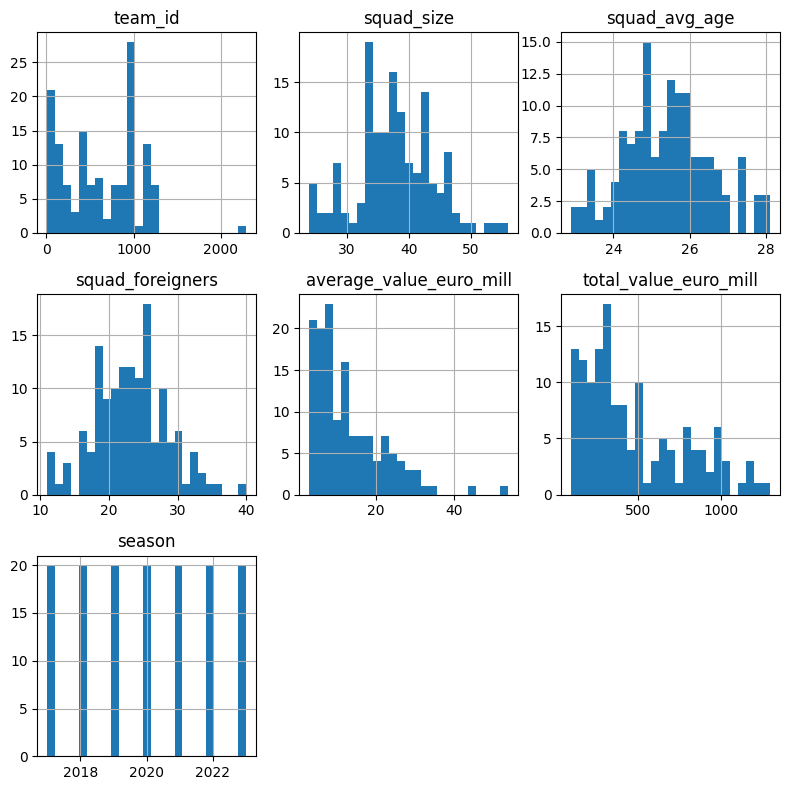

In [7]:
df.hist(bins=25, figsize=(8, 8))
plt.tight_layout()
plt.show()

In [25]:
# create a team/year column
df.loc[:, 'team_season'] = df['team'] + ' - ' + df['season'].astype(str)

In [30]:
# top 10 teams by average market value
avg_val = df.sort_values(by="average_value_euro_mill", ascending=False).head(10)
px.bar(
    avg_val,
    x="team_season",
    y="average_value_euro_mill",
    title="Top 10 teams by average market value",
)

In [32]:
total_val = df.sort_values(by="total_value_euro_mill", ascending=False).head(10)
px.bar(
    total_val,
    x="team_season",
    y="total_value_euro_mill",
    title="Top 10 teams by total market value",
)

In [33]:
df

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season
0,281,Manchester City,manchester-city,32,25.1,22,31.53,1010.00,2017,Manchester City - 2017
1,631,Chelsea FC,fc-chelsea,46,24.7,33,19.22,884.25,2017,Chelsea FC - 2017
2,31,Liverpool FC,fc-liverpool,35,24.9,21,24.50,857.50,2017,Liverpool FC - 2017
3,985,Manchester United,manchester-united,35,26.1,22,24.27,849.50,2017,Manchester United - 2017
4,148,Tottenham Hotspur,tottenham-hotspur,34,24.7,22,24.40,829.60,2017,Tottenham Hotspur - 2017
...,...,...,...,...,...,...,...,...,...,...
135,543,Wolverhampton Wanderers,wolverhampton-wanderers,26,25.7,22,12.60,327.50,2023,Wolverhampton Wanderers - 2023
136,931,Fulham FC,fc-fulham,25,27.9,23,12.54,313.50,2023,Fulham FC - 2023
137,1132,Burnley FC,fc-burnley,33,24.7,25,7.66,252.65,2023,Burnley FC - 2023
138,350,Sheffield United,sheffield-united,31,25.4,18,4.67,144.85,2023,Sheffield United - 2023


In [34]:
# top 10 largest squads
largest_squads = df.sort_values(by="squad_size", ascending=False).head(10)
px.bar(
    largest_squads,
    x="team_season",
    y="squad_size",
    title="Top 10 largest squads",
)

In [36]:
df

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season
0,281,Manchester City,manchester-city,32,25.1,22,31.53,1010.00,2017,Manchester City - 2017
1,631,Chelsea FC,fc-chelsea,46,24.7,33,19.22,884.25,2017,Chelsea FC - 2017
2,31,Liverpool FC,fc-liverpool,35,24.9,21,24.50,857.50,2017,Liverpool FC - 2017
3,985,Manchester United,manchester-united,35,26.1,22,24.27,849.50,2017,Manchester United - 2017
4,148,Tottenham Hotspur,tottenham-hotspur,34,24.7,22,24.40,829.60,2017,Tottenham Hotspur - 2017
...,...,...,...,...,...,...,...,...,...,...
135,543,Wolverhampton Wanderers,wolverhampton-wanderers,26,25.7,22,12.60,327.50,2023,Wolverhampton Wanderers - 2023
136,931,Fulham FC,fc-fulham,25,27.9,23,12.54,313.50,2023,Fulham FC - 2023
137,1132,Burnley FC,fc-burnley,33,24.7,25,7.66,252.65,2023,Burnley FC - 2023
138,350,Sheffield United,sheffield-united,31,25.4,18,4.67,144.85,2023,Sheffield United - 2023


In [37]:
# top 10 oldest squads
oldest_squads = df.sort_values(by="squad_avg_age", ascending=False).head(10)
px.bar(
    oldest_squads,
    x="team_season",
    y="squad_avg_age",
    title="Top 10 oldest squads",
)

In [38]:
# top 10 youngest squads
youngest_squads = df.sort_values(by="squad_avg_age", ascending=True).head(10)
px.bar(
    youngest_squads,
    x="team_season",
    y="squad_avg_age",
    title="Top 10 youngest squads",
)

In [39]:
df

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season
0,281,Manchester City,manchester-city,32,25.1,22,31.53,1010.00,2017,Manchester City - 2017
1,631,Chelsea FC,fc-chelsea,46,24.7,33,19.22,884.25,2017,Chelsea FC - 2017
2,31,Liverpool FC,fc-liverpool,35,24.9,21,24.50,857.50,2017,Liverpool FC - 2017
3,985,Manchester United,manchester-united,35,26.1,22,24.27,849.50,2017,Manchester United - 2017
4,148,Tottenham Hotspur,tottenham-hotspur,34,24.7,22,24.40,829.60,2017,Tottenham Hotspur - 2017
...,...,...,...,...,...,...,...,...,...,...
135,543,Wolverhampton Wanderers,wolverhampton-wanderers,26,25.7,22,12.60,327.50,2023,Wolverhampton Wanderers - 2023
136,931,Fulham FC,fc-fulham,25,27.9,23,12.54,313.50,2023,Fulham FC - 2023
137,1132,Burnley FC,fc-burnley,33,24.7,25,7.66,252.65,2023,Burnley FC - 2023
138,350,Sheffield United,sheffield-united,31,25.4,18,4.67,144.85,2023,Sheffield United - 2023


In [41]:
# clubs with the most foreign players
most_foreign = df.sort_values(by="squad_foreigners", ascending=False).head(10)
px.bar(
    most_foreign,
    x="team_season",
    y="squad_foreigners",
    title="Clubs with the most foreign players",
)

In [42]:
# clubs with the fewest foreign players
fewest_foreign = df.sort_values(by="squad_foreigners", ascending=True).head(10)
px.bar(
    fewest_foreign,
    x="team_season",
    y="squad_foreigners",
    title="Clubs with the fewest foreign players",
)

In [44]:
# percentage of foreign players
df.loc[:, 'foreigner_pct'] = (df['squad_foreigners'] / df['squad_size']) * 100

In [45]:
# top 10 clubs with the highest percentage of foreign players
most_foreign_pct = df.sort_values(by="foreigner_pct", ascending=False).head(10)
px.bar(
    most_foreign_pct,
    x="team_season",
    y="foreigner_pct",
    title="Clubs with the highest percentage of foreign players",
)

In [46]:
# top 10 clubs with the lowest percentage of foreign players
fewest_foreign_pct = df.sort_values(by="foreigner_pct", ascending=True).head(10)
px.bar(
    fewest_foreign_pct,
    x="team_season",
    y="foreigner_pct",
    title="Clubs with the lowest percentage of foreign players",
)

In [49]:
df

,team_id,team,other_names,squad_size,squad_avg_age,squad_foreigners,average_value_euro_mill,total_value_euro_mill,season,team_season,foreigner_pct
0,281,Manchester City,manchester-city,32,25.1,22,31.53,1010.00,2017,Manchester City - 2017,68.750000
1,631,Chelsea FC,fc-chelsea,46,24.7,33,19.22,884.25,2017,Chelsea FC - 2017,71.739130
2,31,Liverpool FC,fc-liverpool,35,24.9,21,24.50,857.50,2017,Liverpool FC - 2017,60.000000
3,985,Manchester United,manchester-united,35,26.1,22,24.27,849.50,2017,Manchester United - 2017,62.857143
4,148,Tottenham Hotspur,tottenham-hotspur,34,24.7,22,24.40,829.60,2017,Tottenham Hotspur - 2017,64.705882
...,...,...,...,...,...,...,...,...,...,...,...
135,543,Wolverhampton Wanderers,wolverhampton-wanderers,26,25.7,22,12.60,327.50,2023,Wolverhampton Wanderers - 2023,84.615385
136,931,Fulham FC,fc-fulham,25,27.9,23,12.54,313.50,2023,Fulham FC - 2023,92.000000
137,1132,Burnley FC,fc-burnley,33,24.7,25,7.66,252.65,2023,Burnley FC - 2023,75.757576
138,350,Sheffield United,sheffield-united,31,25.4,18,4.67,144.85,2023,Sheffield United - 2023,58.064516


In [53]:
# time series of average squad value
px.line(
    df,
    x="season",
    y="average_value_euro_mill",
    title="Average squad value over time",
    color='team'
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [55]:
# time series of total squad value
px.line(
    df,
    x="season",
    y="total_value_euro_mill",
    title="Average squad value over time",
    color='team'
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

